# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Brendon, Mapinda**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [286]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# you may need to install this seperately if you have not used if before: missingno
import missingno as msno

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Setting global constants to ensure note

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [346]:
df_train = pd.read_csv(r"C:\Users\HP PAVILION\Desktop\Python\ML\PREDICT\Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_train.csv")
df_test = pd.read_csv(r"C:\Users\HP PAVILION\Desktop\Python\ML\PREDICT\Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_test.csv")
df_sample = pd.read_csv(r"C:\Users\HP PAVILION\Desktop\Python\ML\PREDICT\edsa-individual-electricity-shortfall-challenge\sample_submission_load_shortfall (1).csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [288]:
df_train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [289]:
df_train.shape

(8763, 49)

In [290]:
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [291]:
# look at data statistics
df_train.describe().T

count          mean           std          min  \
Unnamed: 0            8763.0   4381.000000   2529.804538     0.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Unnamed: 0            2190.500000   4381.000000   6571.500000  8.762000e+03  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.0000

Looking at our data, we can tell the following:

We can see from the Mean(average) that some of the columns such as Barcelona Pressure, Bilbao Pressure, Valencia Pressure etc. show very large values which is far from the range.
This is evident also in their maximum values which would infer the presence of outliers.
We would have to confirm this in our next analysis

Checking Skewness/Kurtosis and Outliers
Skewness is simply the measure of symmetry or more precisely, the lack of symmetry.

Kurtosis is the measure of how heavy its tails are compared to a normal distribution

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_14808/2580010099.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

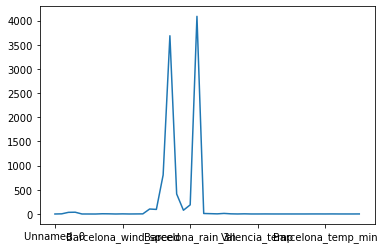

In [292]:
df_train.kurtosis().plot()

In [293]:
#Checking for outliers in the different columns
df_train.kurtosis()

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_14808/210556823.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

* Below are features with large numbers of outliers as shown by **kurtosis > 3**; 
Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.
* The outliers observed in Barcelona_pressure are definitely due to some sort of error, as a pressure of 3687.564230 is too high. The maximum pressure recorded in history is 1084, and the maximum pressure for the other cities in the dataset are also below this value.
* This value can be replaced or dropped during data engineering.
* Valencia_wind_speed has a maximum of 52, there is also something wrong with that value. The highest wind speed recorded in history is 20.This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them.

# Visualization of outliers

C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Barcelona_pressure'>

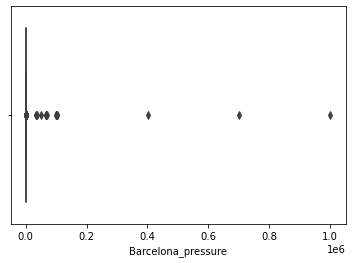

In [294]:
sns.boxplot(df_train['Barcelona_pressure'])

* The boxplot shows that Barcelona_pressure has about seven outliers

* We then looked at values that are greater than the maximum pressure ever recorded (1084). 


<AxesSubplot:xlabel='Valencia_wind_speed'>

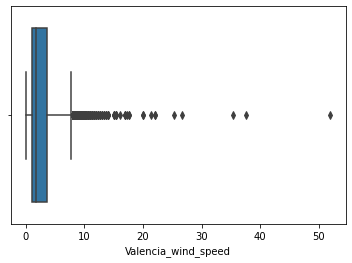

In [295]:
#Visualizing the Valencia_wind_speed data
sns.boxplot(x='Valencia_wind_speed', data=df_train)

* We can see that there is a significant number of outliers in this feature

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_14808/3029453150.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

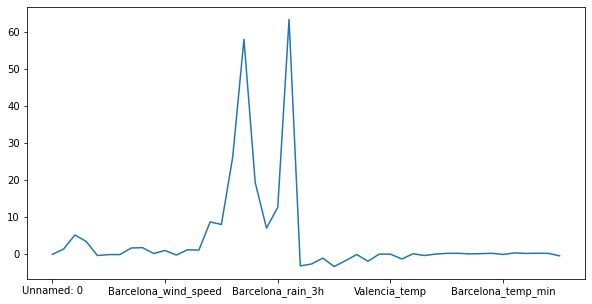

In [296]:
#Checking for outliers in the different columns
plt.figure(figsize = [10,5])
df_train.skew(axis=0, skipna=True).plot()

In [297]:
df_train.skew()

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_14808/1035533876.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

* The following features have high positive symmetrical data; Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Barcelona_rain_3h and Valencia_snow_3h.
* Madrid_weather_id, Barcelona_weather_id and Seville_weather_id have data with high negative symmetry.
* It is also noted that this features are also identified as outliers.


### An Overview of our Target Variable with Time

In [298]:
#Ploting time against Load_shortfall_3h to see relationship
fig = px.line(df_train, y = df_train['load_shortfall_3h'], x =df_train['time'], width =900, height=400)
fig.show()

We can tell from the image the seasonality in the time axis on their load_shortfall_3h values, We will need to desample (break them into bits) this image to get a better understanding of the graph

To do this we will have to desample the time into:

  * Year
  * Months
  * Weeks
  * Days
  * Hours



<AxesSubplot:xlabel='time'>

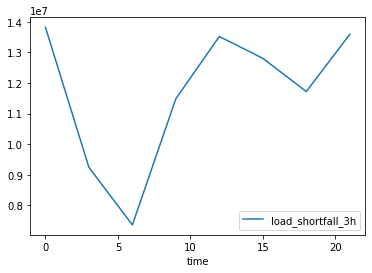

In [299]:
df_train.groupby([df_train['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True)

In [300]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Year',
        y='load_shortfall_3h',width =800, height=400 )

The yearly Load_short_fall plots indicates an increase in load short fall from 2016 down to 2017 surpassing the previous years


In [301]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.month])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Month of Year',
        y='load_shortfall_3h', width =800, height=400)

Also the plot above, indicates a higher 'load short fall' from middle of June down to December

In [302]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.weekofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Week of the Year', y='load_shortfall_3h', width =700, height=400)

C:\Users\HPPAVI~1\AppData\Local\Temp/ipykernel_14808/777855525.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



No much information can be deduced from the the week of the year Load_short_fall as shown above

In [303]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.dayofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Year', y='load_shortfall_3h', width =700, height=400)

The minimum load_short_fall_3h recorded is 1,862k while the maximum is 17,306k as seen from the Day of the year plots

In [304]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.day])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Month', y='load_shortfall_3h', width =800, height=400 )

The plots above shows 10k to 12k consistent recorded values from middle of each to the end of the month

In [305]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.dayofweek])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Week', y='load_shortfall_3h', width =800, height=400 )

There seems to be a decrease in the Load_short_fall_3h Day of the week plots on Fridays and Saturdays, we can not account for the reasons

In [306]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Hour of Day', y='load_shortfall_3h', width =800, height=400 )

There seems to be an increase in the Load_short_fall_3h hourly plots each day, mostly from 10hours and above

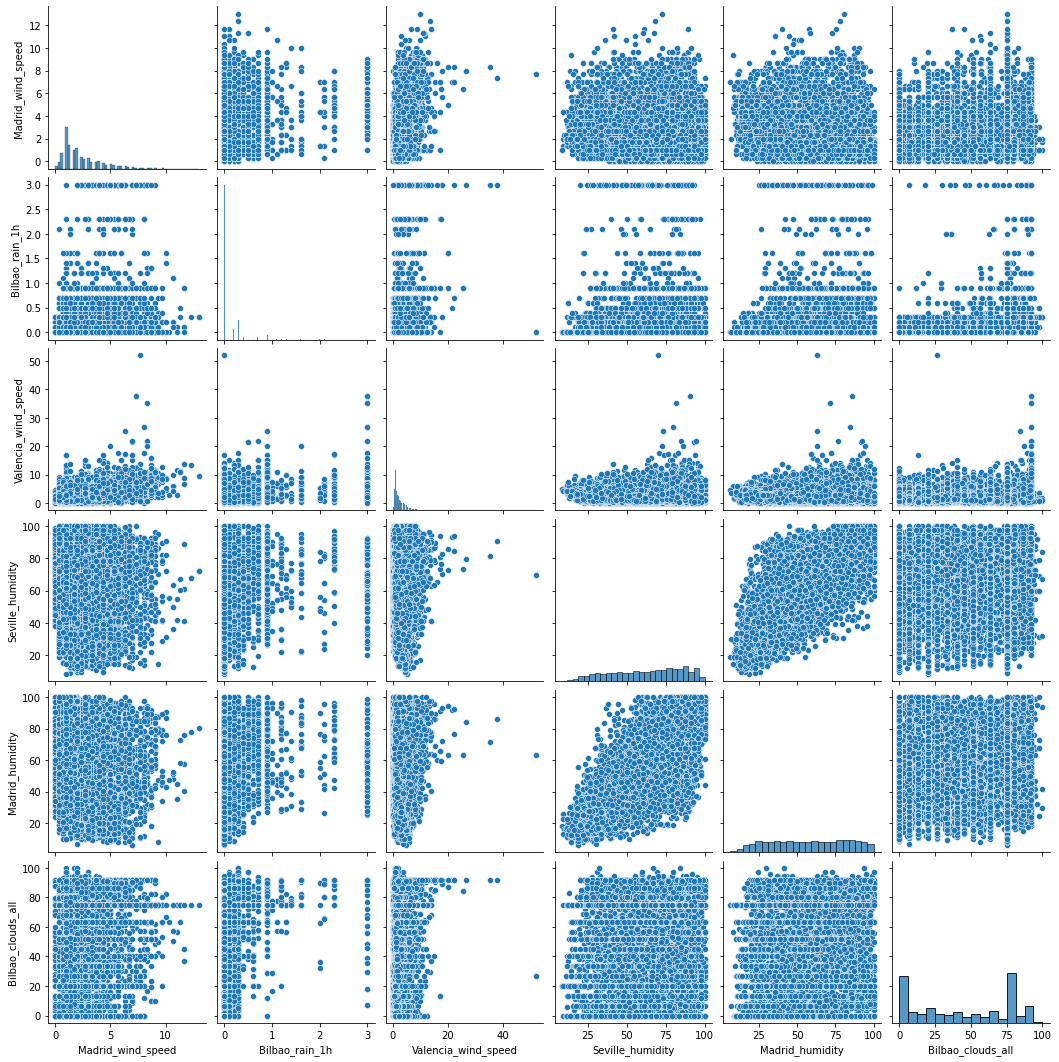

In [307]:
# plot relevant feature interactions
sns.pairplot(df_train[['Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all']])

<AxesSubplot:>

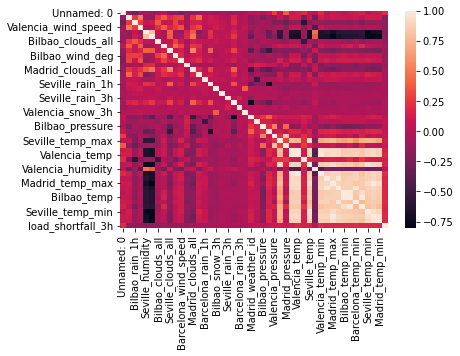

In [308]:
# evaluate correlation

sns.heatmap(df_train.corr())


<AxesSubplot:>

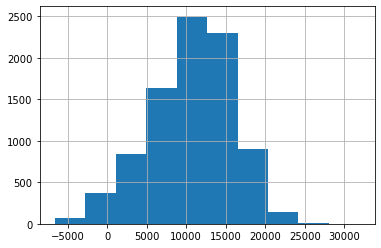

In [309]:
# have a look at feature distributions
df_train.load_shortfall_3h.hist()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

We will be carrying out Feature Engineering in this section of our notebook. 

We have highlighted some key points to consider - 
   * Why should we use Feature Engineering in data science?
   * Feature Selection/Importance
   * Handling missing values
   * Handling outliers
   * Feature Scaling
   
   Why should we use Feature Engineering in data science?
In Data Science, the performance of the model is dependent on data preprocessing and data handling. Suppose if we build a model without Handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more.

Simply, by using Feature Engineering we improve the performance of the model.

We will now do the following:

Drop the Unnammed Column
Connvert both Seville_pressure and Valencia_wind_degree columns from categorical to numerical values.
Also, we will be converting or downsampling the Time column to various date/time format viz;

Year
Month of the Year
Week of the Year
Day of the Year
Day of the Month
Day of the Week
Hour of the Week
Hour of the Day
This will enable us have a better and larger expression of our data during modeling

<AxesSubplot:>

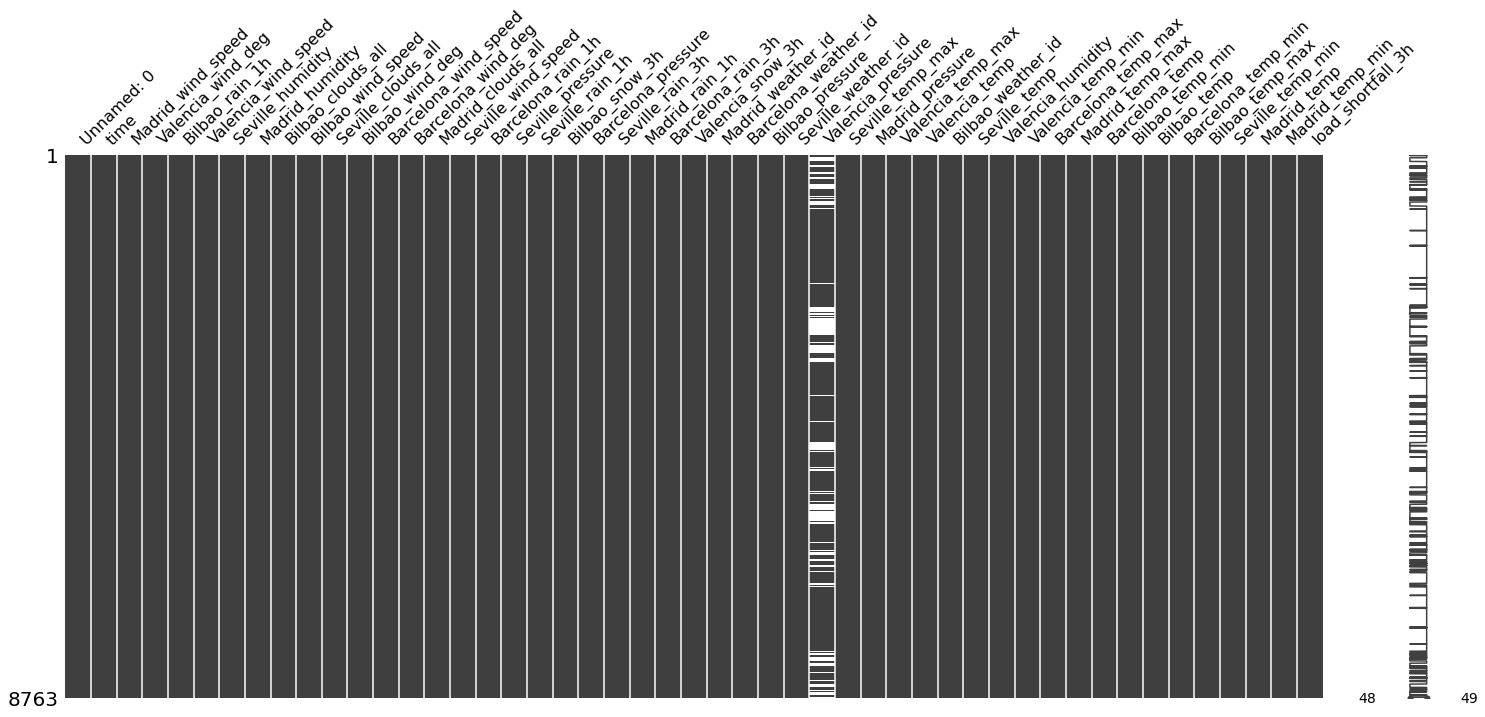

In [310]:
# investigate missing data

msno.matrix(df_train)

C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Valencia_pressure'>

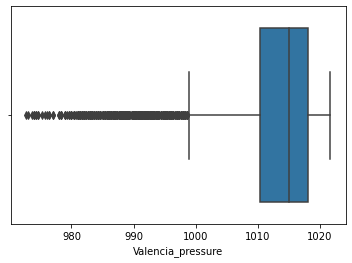

In [311]:
#checking which method to use to replace missing values
sns.boxplot(df_train['Valencia_pressure'])

In [312]:
# look at data statistics of this column

print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1012.0514065222828
Median
1015.0


In [313]:
# remove missing values/ features
# let's clean this - null-imputation to 0

df_clean = df_train

# we will be using this value to fill in the test data as well. 

vp_training_mode=df_clean['Valencia_pressure'].mode()[0]

df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

In [314]:
# remove missing values/ features
# let's clean this - null-imputation to 0

df_clean = df_train

# we will be using this value to fill in the test data as well. 

vp_training_mode=df_clean['Valencia_pressure'].mode()[0]

df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

# typecasting 

df_clean['time'] = pd.to_datetime(df_clean['time'])

# create new features

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [315]:
df_clean['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

In [316]:
df_clean['Year']  = df_clean['time'].astype('datetime64').dt.year
df_clean['Month_of_year']  = df_clean['time'].astype('datetime64').dt.month
df_clean['Week_of_year'] = df_clean['time'].astype('datetime64').dt.isocalendar().week
df_clean['Day_of_year']  = df_clean['time'].astype('datetime64').dt.dayofyear
df_clean['Day_of_month']  = df_clean['time'].astype('datetime64').dt.day
df_clean['Day_of_week'] = df_clean['time'].astype('datetime64').dt.dayofweek
df_clean['Hour_of_week'] = ((df_clean['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_clean['time'].astype('datetime64').dt.hour)
df_clean['Hour_of_day']  = df_clean['time'].astype('datetime64').dt.hour

In [317]:
# engineer features

def hr_func(ts):
    return str(ts.hour)

df_clean['time_hour'] = df_clean['time'].apply(hr_func)

<AxesSubplot:>

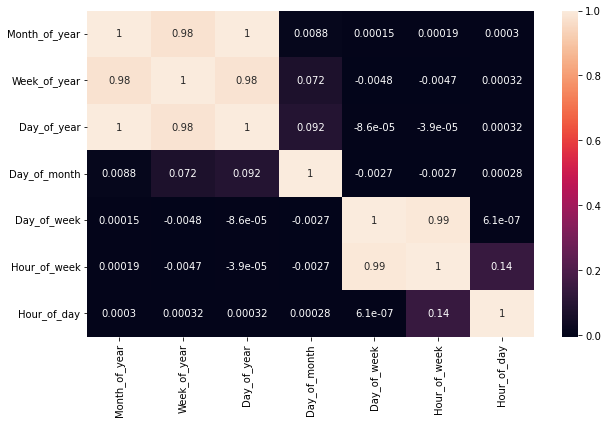

In [318]:
Time_df = df_clean.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

Looking at our heatmap tells us that we have high Multicollinearity present in our new features. The features involved are -

Week of the year
Day of the year
Month of the year
Day of the week
Hour of the week
We would have to drop either one of the features that have high correlation with each other

In [319]:
# remove missing values/ features

df_clean = df_clean.drop(['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0' , 'time'], axis = 1)
df_clean.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Seville_temp_min  Madrid_temp  \
0                 0.0       223.333333  ...        274.254667   265.938000   
1                 0.0       221.000000  ...        274.945000   266.386667   
2                 0.0       214.333333  ...        278.792000   272.708667   
3                 0.0       199.666667  ...        285.394000   281.895219   
4                 0.0       185.000000  ...        285.513719   280.678437   

   Madrid_temp_min  load_shortfall_3h  Year  Month_of_year  Day_of_month  \
0       265.938000        6715.666667  2015              1             1   
1       266.386667        4171.666667  2015              1             1   
2       272.708667        4274.666667  2015              1             1   
3       281.895219        5075.666667  2015              1             1   
4       280.678437        6620.666667  2015              1             1   

   Day_of_week  Hour_of_day  time_hour  
0            3            3          3  
1            3            6          6  
2            3            9          9  
3            3           12         12  
4            3           15         15  

[5 rows x 53 columns]

<AxesSubplot:>

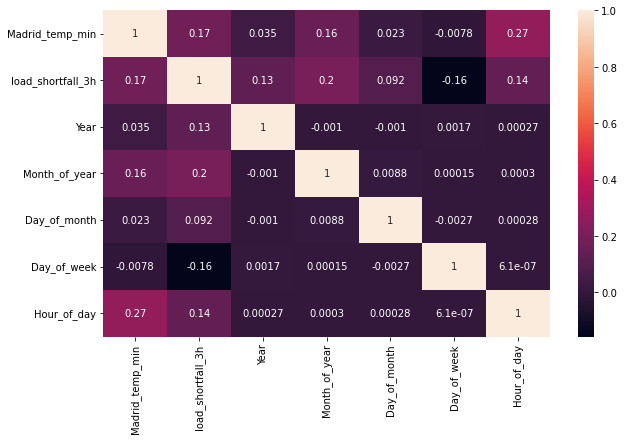

In [320]:
Time_df = df_clean.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

#### Let us chek if this approach corresponds with our feature selection.
Using SelectKBest and Chi2 to perform Feature Selection

In [321]:
## Splitting our data into dependent Variable and Independent Variable
X = df_clean.drop(columns = 'load_shortfall_3h')
y = df_clean['load_shortfall_3h'].astype('int')

In [322]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) #To get the least important feature based on ther score 

Features        Score
29     Madrid_pressure  3436.256231
22    Valencia_snow_3h  3110.383507
37     Madrid_temp_max  2281.817118
44         Madrid_temp  2106.588763
45     Madrid_temp_min  2054.920443
28    Seville_temp_max  1847.097423
43    Seville_temp_min  1589.866015
33        Seville_temp  1483.057026
30   Valencia_temp_max  1365.685590
36  Barcelona_temp_max  1260.724182

In [323]:
# get dummy variables 

df_clean=pd.get_dummies(df_clean, drop_first=True)

In [324]:
df_clean.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Day_of_month  Day_of_week  \
0                 0.0       223.333333  ...             1            3   
1                 0.0       221.000000  ...             1            3   
2                 0.0       214.333333  ...             1            3   
3                 0.0       199.666667  ...             1            3   
4                 0.0       185.000000  ...             1            3   

   Hour_of_day  time_hour_12  time_hour_15  time_hour_18  time_hour_21  \
0            3             0             0             0             0   
1            6             0             0             0             0   
2            9             0             0             0             0   
3           12             1             0             0             0   
4           15             0             1             0             0   

   time_hour_3  time_hour_6  time_hour_9  
0            1            0            0  
1            0            1            0  
2            0            0            1  
3            0            0            0  
4            0            0            0  

[5 rows x 59 columns]

Feature Scaling
Lastly, before we carry out modeling, it is important to scale our data. As we saw during the EDA, we noticed how some columns(features) had values that were out of range when we compared their mean, max and standard deviation. This can result to bias in the model during decision making, thus it is important to convert all the column values to a certain range/scale.

What is Feature Scaling?
Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In this project, we will be carrying out Standard Scaling, becasue of it's robustness to outliers

In [325]:
# Create standardization object
scaler = StandardScaler()

In [326]:
# Save standardized features into new variable
"""
We used a fit transform method, which first fits in the standardscaler and then transforms the data """
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0           -0.565065         0.630823  ...        -2.621665   
1           -0.565065         0.607959  ...        -2.475661   
2           -0.565065         0.542632  ...        -1.821036   
3           -0.565065         0.398912  ...        -0.961406   
4           -0.565065         0.255192  ...        -0.804197   

   Seville_temp_min  Madrid_temp  Madrid_temp_min      Year  Month_of_year  \
0         -2.125118    -2.405393        -2.309892 -1.226179      -1.602429   
1         -2.040702    -2.357388        -2.261154 -1.226179      -1.602429   
2         -1.570279    -1.680968        -1.574407 -1.226179      -1.602429   
3         -0.762967    -0.698057        -0.576488 -1.226179      -1.602429   
4         -0.748327    -0.828246        -0.708665 -1.226179      -1.602429   

   Day_of_month  Day_of_week  Hour_of_day  time_hour  
0     -1.675368     -0.00274    -1.090901  -1.090901  
1     -1.675368     -0.00274    -0.654451  -0.654451  
2     -1.675368     -0.00274    -0.218001  -0.218001  
3     -1.675368     -0.00274     0.218449   0.218449  
4     -1.675368     -0.00274     0.654899   0.654899  

[5 rows x 52 columns]

In [327]:
y.head()

0    6715
1    4171
2    4274
3    5075
4    6620
Name: load_shortfall_3h, dtype: int32

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Model Building
1. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
3. Build a Linear Regression model which would serve as our base model using the train data.
4. Try and improve the linear model by employing Lasso and Ridge
5. Try out other models like decision trees, Random Forest and SVR

In [328]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [329]:
#  create one or more ML models
lm = LinearRegression()
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)
Ridge = Ridge()
Sv_reg = SVR(kernel='rbf', gamma='auto')
Reg_tree = DecisionTreeRegressor(random_state=42)
RF = RandomForestRegressor(n_estimators=200, max_depth=8)

In [330]:
# evaluate one or more ML models
lm.fit(X_train, y_train)
lasso.fit(X_train, y_train)
Ridge.fit(X_train, y_train)
Sv_reg.fit(X_train,y_train)
Reg_tree.fit(X_train,y_train)
RF.fit(X_train,y_train)

C:\Users\HP PAVILION\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74514336092.94855, tolerance: 18919669.086498275



RandomForestRegressor(max_depth=8, n_estimators=200)

In [331]:
# predict
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set
lasso_pred = lasso.predict(X_test)
Ridge_pred = Ridge.predict(X_test)
SV_pred = Sv_reg.predict(X_test)
Tree_pred = Reg_tree.predict(X_test)
RF_predict = RF.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [332]:
#model perfomance
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Decision Tree  4072.029669
Lasso          4750.137479
Linear model   4748.405243
Random Forest  3320.657345
Ridge          4748.812834
SVR            5290.750470

# Choose best model and motivate why it is the best choice


In [333]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

From the graph above, we can confirm that the Random Forest model performs better than others in terms of RMSE

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# discuss chosen methods logic
* Initially I started building my model using linear regression.
* However a linear model is not appropriate for data that is not linear, it also suffers from multi-colinearity.
* Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
* Lasso regression helps in reducing overfitting but and in feature selection by setting coefficients with high values to zero.
* Decision trees are not affected by multicolinearity, they support non-linearity and are resistant to outliers further more they require little data preprocessing.
* However Decision trees are prone to overfitting and parameter tuning can led to biased learned trees if some classes dominate.
* Random forests address the problem of overfitting.
* They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the mean of the classes as the prediction of all the trees.

To conclude 

* As an aspiring data scientists I have developed a model that will assist in predicting the 3 hourly load shortfall of power generated by renewable sources in Spain .
* This will assist in informing the Spanish Government of any trends and patterns of the country's renewable resources and fossil fuel energy generation and whether it is viable to expand its' renewable energy resource infrastructure investments.

In [375]:
df_test = pd.read_csv(r"C:\Users\HP PAVILION\Desktop\Python\ML\PREDICT\Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_test.csv")

In [376]:
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [377]:
output = pd.DataFrame({"time":df_test['time']})
# typecasting 

df_test['time'] = pd.to_datetime(df_test['time'])

# create new features

df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)').astype('int64')

df_test['Year']  = df_test['time'].astype('datetime64').dt.year
df_test['Month_of_year']  = df_test['time'].astype('datetime64').dt.month
df_test['Week_of_year'] = df_test['time'].astype('datetime64').dt.isocalendar().week
df_test['Day_of_year']  = df_test['time'].astype('datetime64').dt.dayofyear
df_test['Day_of_month']  = df_test['time'].astype('datetime64').dt.day
df_test['Day_of_week'] = df_test['time'].astype('datetime64').dt.dayofweek
df_test['Hour_of_week'] = ((df_test['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_test['time'].astype('datetime64').dt.hour)
df_test['Hour_of_day']  = df_test['time'].astype('datetime64').dt.hour
# engineer features
time = df_test['time']
def hr_func(ts):
    return str(ts.hour)

df_test['time_hour'] = df_test['time'].apply(hr_func)
# remove missing values/ features

df_test = df_test.drop(['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0' , 'time'], axis = 1)


# get dummy variables 

df_test=pd.get_dummies(df_clean, drop_first=True)

df_test.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Day_of_month  Day_of_week  \
0                 0.0       223.333333  ...             1            3   
1                 0.0       221.000000  ...             1            3   
2                 0.0       214.333333  ...             1            3   
3                 0.0       199.666667  ...             1            3   
4                 0.0       185.000000  ...             1            3   

   Hour_of_day  time_hour_12  time_hour_15  time_hour_18  time_hour_21  \
0            3             0             0             0             0   
1            6             0             0             0             0   
2            9             0             0             0             0   
3           12             1             0             0             0   
4           15             0             1             0             0   

   time_hour_3  time_hour_6  time_hour_9  
0            1            0            0  
1            0            1            0  
2            0            0            1  
3            0            0            0  
4            0            0            0  

[5 rows x 59 columns]

In [378]:
# Create standardization object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_temp_max  \
0           -0.565065         0.630823  ...        -2.621665   
1           -0.565065         0.607959  ...        -2.475661   
2           -0.565065         0.542632  ...        -1.821036   
3           -0.565065         0.398912  ...        -0.961406   
4           -0.565065         0.255192  ...        -0.804197   

   Seville_temp_min  Madrid_temp  Madrid_temp_min      Year  Month_of_year  \
0         -2.125118    -2.405393        -2.309892 -1.226179      -1.602429   
1         -2.040702    -2.357388        -2.261154 -1.226179      -1.602429   
2         -1.570279    -1.680968        -1.574407 -1.226179      -1.602429   
3         -0.762967    -0.698057        -0.576488 -1.226179      -1.602429   
4         -0.748327    -0.828246        -0.708665 -1.226179      -1.602429   

   Day_of_month  Day_of_week  Hour_of_day  time_hour  
0     -1.675368     -0.00274    -1.090901  -1.090901  
1     -1.675368     -0.00274    -0.654451  -0.654451  
2     -1.675368     -0.00274    -0.218001  -0.218001  
3     -1.675368     -0.00274     0.218449   0.218449  
4     -1.675368     -0.00274     0.654899   0.654899  

[5 rows x 52 columns]

In [379]:
X_scaled['load_shortfall_3h'] = RF.predict(X_scaled)

In [381]:
X_scaled['time'] = time
load = X_scaled[['time','load_shortfall_3h']]
load.to_csv('Brendon Simbarashe Mapinda.csv', index = False)
load

time  load_shortfall_3h
0    2018-01-01 00:00:00        5561.523016
1    2018-01-01 03:00:00        4694.946576
2    2018-01-01 06:00:00        5331.051199
3    2018-01-01 09:00:00        6484.631593
4    2018-01-01 12:00:00        6939.552098
...                  ...                ...
8758                 NaT        7380.748877
8759                 NaT        9746.836433
8760                 NaT        8019.070182
8761                 NaT        9355.371494
8762                 NaT        9707.171114

[8763 rows x 2 columns]